Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 2

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Plot the distribution of your target. 
    - Classification problem: Are your classes imbalanced? Then, don't use just accuracy.
    - Regression problem: Is your target skewed? If so, let's discuss in Slack.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline?
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

In [0]:
lat, lon = 6.75189646, -75.19042969
year = 2010
api_key = 'OjVCw5oOv4BRmcldYUf4RIQrWrgIfbRMXISJubzX'
attributes = 'ghi,dhi,dni,wind_speed,air_temperature,solar_zenith_angle,wind_speed,cloud_type,fill_flag,relative_humidity,surface_albedo,surface_pressure,wind_direction,dew_point'

leap_year = 'false'
interval = '30'
utc = 'true'
your_name = 'John+Smith'
reason_for_use = 'beta+testing'
your_affiliation = 'my+institution'

your_email = 'matthewlsessions@gmail.com'
mailing_list = 'true'

import pandas as pd

year = '2010'

df1 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df1 = df1.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))


year = '2011'

df2 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df2 = df2.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

df1 = pd.concat([df1,df2])

In [0]:
lat, lon, year = 6.75189646, -75.19042969, 2012
year = '2012'
leap_year = 'true'
dfl = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


dfl = dfl.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=527040/int(interval)))

df1 = pd.concat([df1,dfl])

In [0]:
year = '2013'
lat, lon, year = 6.75189646, -75.19042969, 2013
leap_year = 'false'
df3 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df3 = df3.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

df1 = pd.concat([df1,df3])

In [0]:
year = '2014'

df4 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df4 = df4.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

df1 = pd.concat([df1,df4])

In [15]:
df1.tail()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2014-12-31 21:30:00,2014,12,31,21,30,147,130,54,0.0,22,71.47,3,0,85.14,0.162,850.0,11.2,19
2014-12-31 22:00:00,2014,12,31,22,0,65,65,0,0.1,21,78.15,3,0,90.14,0.162,850.0,325.5,20
2014-12-31 22:30:00,2014,12,31,22,30,22,22,0,0.1,20,84.92,3,4,95.84,0.162,850.0,325.5,20
2014-12-31 23:00:00,2014,12,31,23,0,0,0,0,0.1,19,91.75,1,0,100.00,0.162,850.0,288.2,20
2014-12-31 23:30:00,2014,12,31,23,30,0,0,0,0.1,19,98.62,0,0,100.00,0.162,850.0,288.2,20


In [16]:
year = 2015

df5 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df5 = df5.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

df1 = pd.concat([df1,df5])
df1.tail()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2015-12-31 21:30:00,2015,12,31,21,30,273,80,607,0.1,25,71.50,0,0,67.53,0.166,850.0,349.1,18
2015-12-31 22:00:00,2015,12,31,22,0,153,65,426,0.1,24,78.18,0,0,76.63,0.166,850.0,328.7,19
2015-12-31 22:30:00,2015,12,31,22,30,50,34,182,0.0,23,84.95,1,0,81.41,0.166,850.0,328.7,19
2015-12-31 23:00:00,2015,12,31,23,0,0,0,0,0.0,22,91.78,0,0,84.25,0.166,850.0,304.9,20
2015-12-31 23:30:00,2015,12,31,23,30,0,0,0,0.0,22,98.65,0,0,84.25,0.166,850.0,304.9,20


In [17]:
!pip install pysolar

In [19]:
from pysolar.solar import *

date = datetime.datetime(2015, 12, 31, 23, 30, tzinfo=datetime.timezone.utc)
float(90) - get_altitude(6.75189646, -75.19042969, date)

98.64295895125696

In [0]:
year = '2016'
leap_year = 'true'
test = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


test = test.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=527040/int(interval)))

In [32]:
test.head(3)

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2016-01-01 00:00:00,2016,1,1,0,0,0,0,0,0.0,21,105.54,3,0,91.70,0.162,850.0,288.7,20
2016-01-01 00:30:00,2016,1,1,0,30,0,0,0,0.0,20,112.44,1,0,97.51,0.162,850.0,288.7,20
2016-01-01 01:00:00,2016,1,1,1,0,0,0,0,0.0,20,119.32,1,0,98.16,0.162,850.0,271.0,20


In [0]:
dist = df1.copy()

In [0]:
dist = dist[dist.GHI > 40]

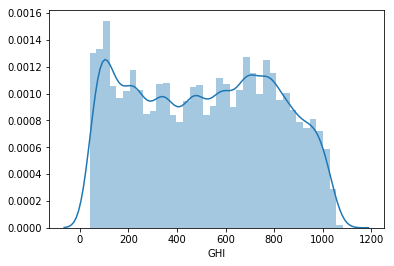

In [29]:
import seaborn as sns

sns.distplot(dist.GHI)

In [0]:
features = ['Wind Speed','Temperature','Solar Zenith Angle','Pressure','Surface Albedo']
target = 'GHI'

In [0]:
from xgboost import XGBRegressor

boost = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)


In [0]:
boost.fit(df1[features],df1[target])


In [0]:
y_pred_train = boost.predict(df1[features])

print(r2_score(df1[target],y_pred_train))
print(mean_absolute_error(df1[target],y_pred_train))

In [0]:
y_pred_test = boost.predict(test[features])

print(r2_score(test[target],y_pred_test))
print(mean_absolute_error(test[target],y_pred_test))